In [ ]:
!pip install lazypredict

# Import Packages

In [ ]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score,f1_score,precision_score
#Visualization
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import auc
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Read Data

In [ ]:
df = pd.read_csv('feature-of-my-tez.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 309 entries, Group to percentcon
dtypes: float64(273), int64(35), object(1)
memory usage: 108.8+ KB


,Group,Age,Sex,Fp1 P_Delta,Fp2 P_Delta,F7 P_Delta,F3 P_Delta,Fz P_Delta,F4 P_Delta,F8 P_Delta,...,pererr,tonumcor,tonumerr,tonumtri,nonerr,timetest,trylevone,perconres,failmain,percentcon
0,0,63,Female,12.66,6.89,18.35,10.22,9.28,8.76,11.75,...,9,33,27,60,18,602,10,6,0,100
1,1,43,Female,4.45,4.71,11.19,5.73,4.86,4.95,10.92,...,10,35,25,60,15,290,9,6,0,100
2,0,18,Female,15.30,4.68,5.15,4.27,8.79,7.83,6.61,...,1,44,14,58,13,170,17,6,1,100
3,1,21,Male,2.72,7.62,8.37,3.62,4.09,5.82,4.84,...,1,40,15,55,14,145,8,6,0,100
4,0,22,Female,2.88,24.18,4.00,4.06,3.00,2.51,2.36,...,5,35,25,60,20,230,26,0,2,0


In [ ]:
y = df['Group']
X = df.drop('Group', axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['Sex']=le.fit_transform(X['Sex'])

In [ ]:
X.head()

,Age,Sex,Fp1 P_Delta,Fp2 P_Delta,F7 P_Delta,F3 P_Delta,Fz P_Delta,F4 P_Delta,F8 P_Delta,M1 P_Delta,...,pererr,tonumcor,tonumerr,tonumtri,nonerr,timetest,trylevone,perconres,failmain,percentcon
0,63,0,12.66,6.89,18.35,10.22,9.28,8.76,11.75,35.08,...,9,33,27,60,18,602,10,6,0,100
1,43,0,4.45,4.71,11.19,5.73,4.86,4.95,10.92,2.61,...,10,35,25,60,15,290,9,6,0,100
2,18,0,15.30,4.68,5.15,4.27,8.79,7.83,6.61,19.26,...,1,44,14,58,13,170,17,6,1,100
3,21,1,2.72,7.62,8.37,3.62,4.09,5.82,4.84,27.72,...,1,40,15,55,14,145,8,6,0,100
4,22,0,2.88,24.18,4.00,4.06,3.00,2.51,2.36,6.66,...,5,35,25,60,20,230,26,0,2,0


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Group, dtype: int64

In [ ]:
X.head()

,Age,Sex,Fp1 P_Delta,Fp2 P_Delta,F7 P_Delta,F3 P_Delta,Fz P_Delta,F4 P_Delta,F8 P_Delta,M1 P_Delta,...,pererr,tonumcor,tonumerr,tonumtri,nonerr,timetest,trylevone,perconres,failmain,percentcon
0,63,0,12.66,6.89,18.35,10.22,9.28,8.76,11.75,35.08,...,9,33,27,60,18,602,10,6,0,100
1,43,0,4.45,4.71,11.19,5.73,4.86,4.95,10.92,2.61,...,10,35,25,60,15,290,9,6,0,100
2,18,0,15.30,4.68,5.15,4.27,8.79,7.83,6.61,19.26,...,1,44,14,58,13,170,17,6,1,100
3,21,1,2.72,7.62,8.37,3.62,4.09,5.82,4.84,27.72,...,1,40,15,55,14,145,8,6,0,100
4,22,0,2.88,24.18,4.00,4.06,3.00,2.51,2.36,6.66,...,5,35,25,60,20,230,26,0,2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
fvalue_Best = SelectKBest(score_func=f_classif, k=11)
X_kbest = fvalue_Best.fit_transform(X_train, y_train)
X_kbest_test = fvalue_Best.transform(X_test)
dp = pd.DataFrame(X_kbest)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)
dpt = pd.DataFrame(X_kbest, columns=['Sex','Cz RWE_k=4','P3 WE_k=1','C3 RWE_k=4','T3 RWE_k=4','M1 RWE_k=4','C4 RWE_k=3','P3 P_Beta','F4 RWE_k=2','FZ RWE_k=2','C3 RWE_k=5'])
#dppt=DataFrame.sort_index(dpt, axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)
X=dpt

Original number of features: (45, 308)
Reduced number of features: (45, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = X.columns

In [ ]:
X.head()

,Sex,Cz RWE_k=4,P3 WE_k=1,C3 RWE_k=4,T3 RWE_k=4,M1 RWE_k=4,C4 RWE_k=3,P3 P_Beta,F4 RWE_k=2,FZ RWE_k=2,C3 RWE_k=5
0,-0.78,0.58,-0.05,-0.68,-0.69,-0.92,0.10,0.10,0.08,-0.06,0.42
1,-0.78,-0.10,-0.50,-0.89,-0.89,-0.08,-0.43,-0.43,-0.46,-0.31,0.35
2,-0.78,-0.82,-0.97,-2.05,-2.05,-1.47,-0.95,-0.94,-0.92,-0.98,-1.17
3,1.28,-1.09,1.92,0.58,0.58,0.03,1.75,1.76,1.74,1.64,1.37
4,-0.78,-1.02,-0.67,0.24,0.23,0.36,-0.63,-0.63,-0.57,-0.58,1.29


Mean ACC:  0.8666666666666666  Mean precision:  0.805  Mean Recall:  0.95  Mean F1:  0.8692063492063492  Mean AUC:  0.8483333333333334


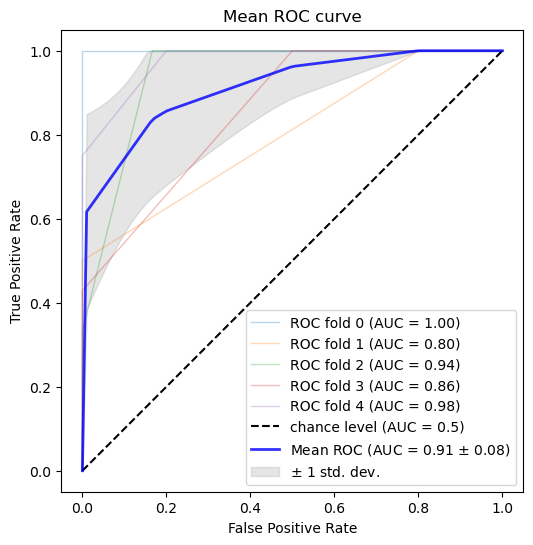

In [ ]:
from sklearn.metrics import accuracy_score
from statistics import mean
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE

kf = KFold(n_splits=5, shuffle = True)
f1=[]
acc=[]
recall=[]
precision=[]
AUC=[]
prs = []
aucs = []
k=0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(6, 6))
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    ros = SMOTE(sampling_strategy=0.995)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    #knn
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_resampled, y_resampled)
    preds = clf.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
    AUC.append(metrics.auc(fpr, tpr))
    f1.append(f1_score(y_test, preds))
    acc.append(accuracy_score(y_test, preds))
    recall.append(recall_score(y_test,preds))
    precision.append(precision_score(y_test, preds))
    viz = RocCurveDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        name=f"ROC fold {k}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    k+=1
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
print("Mean ACC: ",mean(acc)," Mean precision: ",mean(precision)," Mean Recall: ",mean(recall)," Mean F1: ",mean(f1)," Mean AUC: ",mean(AUC))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
title=f"Mean ROC curve",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()